In [1]:
import pandas as pd




In [4]:
# Use an r-string (raw string) to handle backslashes in Windows paths
excel_path = r"C:\Users\tyzwh\OneDrive\Northwood\BSGX\Key_Financials__10-K__last_3_FYs_.xlsx"

# Read your Excel workbook
df = pd.read_excel(excel_path)

df.head()

,Company,Fiscal Year,Fiscal Year End,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash from Ops
0,Microsoft,2025,2025-06-30,281724,101832,619003,275524,140814
1,Microsoft,2024,2024-06-30,245122,88136,512163,243686,118548
2,Microsoft,2023,2023-06-30,211915,72361,411976,205753,87582
3,Apple,2024,2024-09-28,391035,93736,364980,308030,118254
4,Apple,2023,2023-09-30,383285,96995,352583,290437,110543


In [ ]:


# Save it as a CSV
df.to_csv("10K_key_financials_MSFT_AAPL_TSLA.csv", index=False)


In [10]:
# Read in the CSV file
df = pd.read_csv("10K_key_financials_MSFT_AAPL_TSLA.csv")
df.head()

,Company,Fiscal Year,Fiscal Year End,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash from Ops
0,Microsoft,2025,2025-06-30,281724,101832,619003,275524,140814
1,Microsoft,2024,2024-06-30,245122,88136,512163,243686,118548
2,Microsoft,2023,2023-06-30,211915,72361,411976,205753,87582
3,Apple,2024,2024-09-28,391035,93736,364980,308030,118254
4,Apple,2023,2023-09-30,383285,96995,352583,290437,110543


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            9 non-null      object
 1   Fiscal Year        9 non-null      int64 
 2   Fiscal Year End    9 non-null      object
 3   Total Revenue      9 non-null      int64 
 4   Net Income         9 non-null      int64 
 5   Total Assets       9 non-null      int64 
 6   Total Liabilities  9 non-null      int64 
 7   Cash from Ops      9 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 708.0+ bytes


,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash from Ops
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2023.333333,242592.666667,65286.333333,324942.888889,194816.888889,82310.555556
std,1.000000,130170.608294,41234.091393,187055.552972,118351.999853,52817.389925
min,2022.000000,81462.000000,7153.000000,82338.000000,36440.000000,13256.000000
25%,2023.000000,97690.000000,14974.000000,122070.000000,48390.000000,14923.000000
50%,2023.000000,245122.000000,88136.000000,352755.000000,243686.000000,110543.000000
75%,2024.000000,383285.000000,96995.000000,411976.000000,290437.000000,118548.000000
max,2025.000000,394328.000000,101832.000000,619003.000000,308030.000000,140814.000000


In [ ]:
# Sort the data to ensure correct order for pct_change
df = df.sort_values(by=['Company', 'Fiscal Year'])

# Calculate YoY growth for key metrics
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash from Ops'].pct_change() * 100

# Round for readability
df = df.round(2)

# Display results
df


,Company,Fiscal Year,Fiscal Year End,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash from Ops,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
5,Apple,2022,2022-09-24,394328,99803,352755,302083,122151,NaN,NaN,NaN,NaN,NaN
4,Apple,2023,2023-09-30,383285,96995,352583,290437,110543,-2.80,-2.81,-0.05,-3.86,-9.50
3,Apple,2024,2024-09-28,391035,93736,364980,308030,118254,2.02,-3.36,3.52,6.06,6.98
2,Microsoft,2023,2023-06-30,211915,72361,411976,205753,87582,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2024,2024-06-30,245122,88136,512163,243686,118548,15.67,21.80,24.32,18.44,35.36
0,Microsoft,2025,2025-06-30,281724,101832,619003,275524,140814,14.93,15.54,20.86,13.07,18.78
8,Tesla,2022,2022-12-31,81462,12587,82338,36440,14724,NaN,NaN,NaN,NaN,NaN
7,Tesla,2023,2023-12-31,96773,14974,106618,43009,13256,18.80,18.96,29.49,18.03,-9.97
6,Tesla,2024,2024-12-31,97690,7153,122070,48390,14923,0.95,-52.23,14.49,12.51,12.58


In [13]:
# Average growth across 3 years per company
summary = df.groupby('Company')[
    ['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']
].mean().round(2)

summary


,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
Company,,,,,
Apple,-0.39,-3.08,1.74,1.10,-1.26
Microsoft,15.30,18.67,22.59,15.76,27.07
Tesla,9.88,-16.63,21.99,15.27,1.30


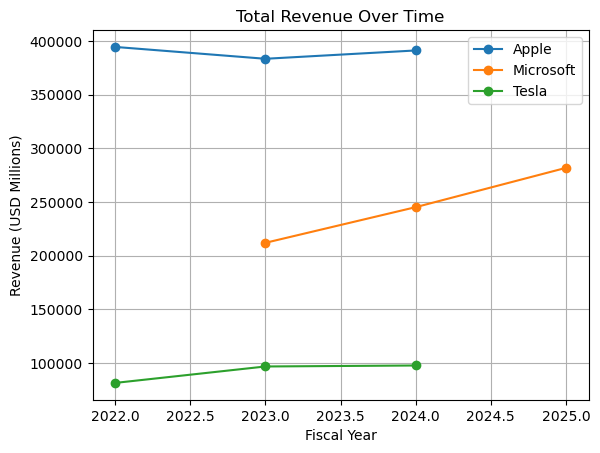

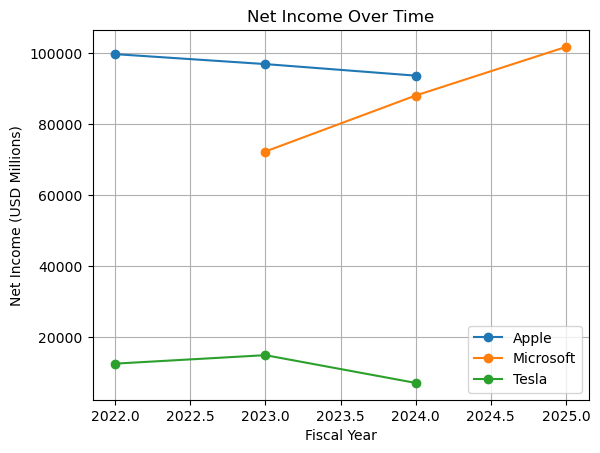

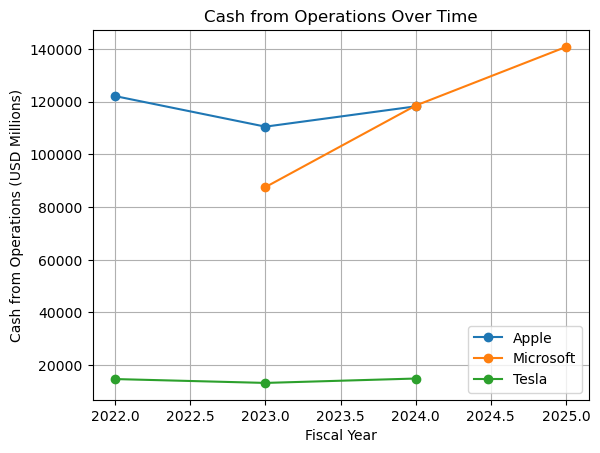

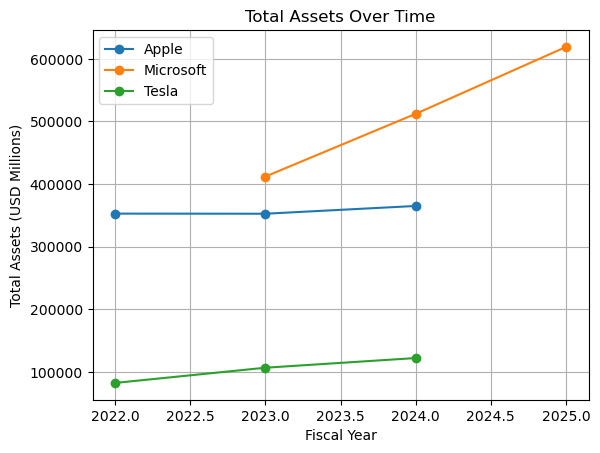

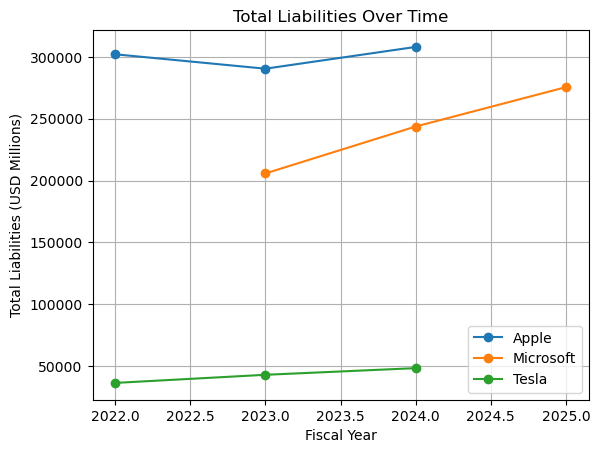

In [16]:
import matplotlib.pyplot as plt

# Plot revenue trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Total Revenue'], marker='o', label=company)

plt.title('Total Revenue Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()

# Plot net income trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Net Income'], marker='o', label=company) # Added marker for better visibility
plt.title('Net Income Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Income (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()

# Plot cash flow trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Cash from Ops'], marker='o', label=company) # Added marker for better visibility
plt.title('Cash from Operations Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Cash from Operations (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()


# Plot assets trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Total Assets'], marker='o', label=company) # Added marker for better visibility
plt.title('Total Assets Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Assets (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()

# Plot liabilities trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Total Liabilities'], marker='o', label=company) # Added marker for better visibility
plt.title('Total Liabilities Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Liabilities (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()




# Financial Trend Analysis of Microsoft, Apple, and Tesla (10-K Filings)

This notebook analyzes financial data extracted from the past three fiscal years of 10-K reports for **Microsoft**, **Apple**, and **Tesla**.  
The objective is to identify year-over-year trends in key metrics and prepare insights for a GenAI-powered financial chatbot.

**Metrics analyzed:**
- Total Revenue  
- Net Income  
- Total Assets  
- Total Liabilities  
- Cash Flow from Operating Activities  

The data was sourced from official SEC 10-K filings and processed using `pandas` for time-series trend analysis.


## Data Preparation

The financial data was compiled from 10-K filings into an Excel sheet and then converted into a CSV file.  
I used `pandas` to load and structure the dataset for analysis.


## Year-over-Year Financial Growth Analysis

To measure company performance trends, we calculated **year-over-year percentage changes** for each financial metric using:

First I Sorted the data to ensure correct order for pct_change

df = df.sort_values(by=['Company', 'Fiscal Year'])

```python
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash from Ops'].pct_change() * 100

#rounded to 2 decimal points for readability
df = df.round(2)


# Summary table and graphs

I then used aggregate function Mean to quickly summarize the average growth across 3 years per company

summary = df.groupby('Company')[
    ['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']
].mean().round(2)

# Matplotlib
After this I used matplotlib to visualize the trends for each category for their respective companies over time
example code for first graph:

Plot revenue trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Total Revenue'], marker='o', label=company)

plt.title('Total Revenue Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()

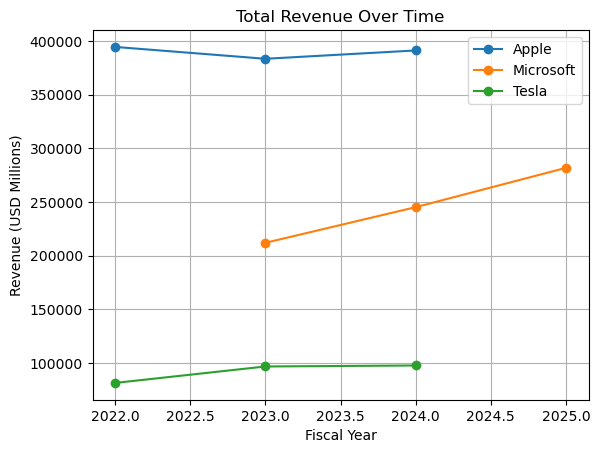




# Summary of Findings and Insights

### 1. Revenue Trends
- **Microsoft** displayed consistent revenue growth across all three fiscal years, increasing from approximately **$212B in 2023 to $282B in 2025**.  
- **Apple’s** revenue remained relatively stable, fluctuating slightly around the **$390B** mark.  
- **Tesla** demonstrated strong growth between 2022 and 2023, followed by a modest slowdown in 2024.

### 2. Profitability (Net Income)
- **Microsoft’s** net income showed steady improvement year-over-year, indicating consistent earnings growth.  
- **Apple’s** net income remained strong but experienced a minor decline in 2024 compared to previous years.  
- **Tesla’s** net income increased sharply from 2022 to 2023 but decreased notably in 2024.

### 3. Cash Flow from Operating Activities
- **Microsoft** and **Apple** both reported sustained, positive operating cash flows across all years.  
- **Tesla’s** operating cash flow remained positive but exhibited more fluctuation over the three-year period.

### 4. Assets and Liabilities
- **All three companies** expanded their total assets over the period analyzed.  
- **Microsoft** showed significant growth in total assets, maintaining a healthy balance sheet relative to liabilities.  
- **Apple** recorded the highest absolute level of liabilities, though its asset base remained strong.  
- **Tesla** continued to increase assets and liabilities in line with its growth trajectory.

### 5. Overall Observations
- **Microsoft** demonstrated consistent growth and financial stability across key metrics.  
- **Apple** maintained steady performance, reflecting maturity and stability in its financial profile.  
- **Tesla** exhibited higher volatility in profitability and cash flow, reflecting more variable year-to-year performance.

---

### 💬 Application for GenAI Chatbot
These findings establish the foundation for a **financial analysis chatbot** that can:
- Summarize company performance trends clearly and concisely.  
- Compare key financial indicators across companies and years.  
- Generate narrative insights directly from structured financial data.

This approach ensures that the chatbot provides accurate, data-grounded summaries while maintaining neutrality and analytical precision.


In [17]:
df.columns

Index(['Company', 'Fiscal Year', 'Fiscal Year End', 'Total Revenue',
       'Net Income', 'Total Assets', 'Total Liabilities', 'Cash from Ops',
       'Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)',
       'Liabilities Growth (%)', 'Cash Flow Growth (%)'],
      dtype='object')